<a href="https://colab.research.google.com/github/MADESH-KN/511323106027-CRACKING-THE-MARKETCODE/blob/main/smartcity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

15:57:49 | LDR=977 | IR=1 | Distance=177.76 cm | Signal=RED
15:57:50 | LDR=896 | IR=1 | Distance=113.4 cm | Signal=RED
15:57:51 | LDR=703 | IR=0 | Distance=91.21 cm | Signal=RED
15:57:52 | LDR=143 | IR=1 | Distance=62.54 cm | Signal=YELLOW
15:57:53 | LDR=147 | IR=1 | Distance=131.17 cm | Signal=YELLOW
15:57:54 | LDR=188 | IR=0 | Distance=135.82 cm | Signal=YELLOW
15:57:55 | LDR=674 | IR=0 | Distance=45.5 cm | Signal=RED
15:57:56 | LDR=714 | IR=1 | Distance=155.52 cm | Signal=RED
15:57:57 | LDR=574 | IR=0 | Distance=195.78 cm | Signal=RED
15:57:58 | LDR=143 | IR=0 | Distance=134.02 cm | Signal=YELLOW
15:57:59 | LDR=602 | IR=1 | Distance=27.78 cm | Signal=GREEN
15:58:00 | LDR=807 | IR=0 | Distance=191.76 cm | Signal=RED
15:58:01 | LDR=174 | IR=1 | Distance=152.81 cm | Signal=YELLOW
15:58:02 | LDR=428 | IR=1 | Distance=53.64 cm | Signal=RED
15:58:03 | LDR=254 | IR=1 | Distance=100.7 cm | Signal=YELLOW


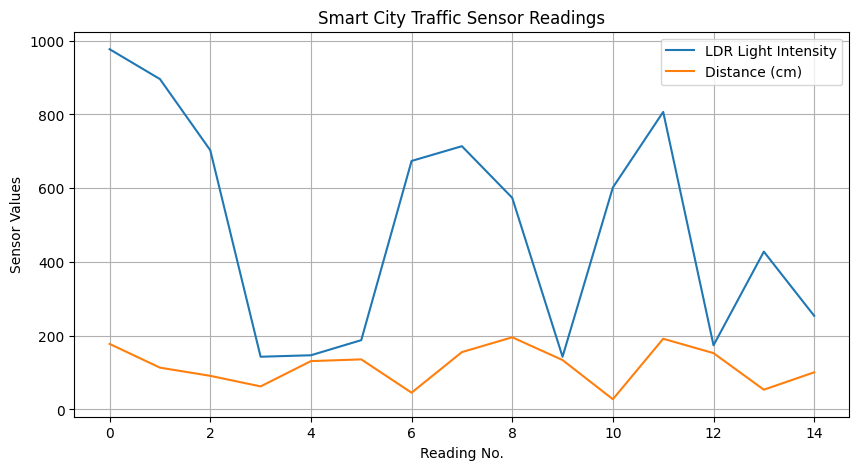

Sent data to ThingSpeak (Status 200)
Sent data to ThingSpeak (Status 200)
Sent data to ThingSpeak (Status 200)
Sent data to ThingSpeak (Status 200)
Sent data to ThingSpeak (Status 200)
Sent data to ThingSpeak (Status 200)
Sent data to ThingSpeak (Status 200)
Sent data to ThingSpeak (Status 200)
Sent data to ThingSpeak (Status 200)
Sent data to ThingSpeak (Status 200)
Sent data to ThingSpeak (Status 200)
Sent data to ThingSpeak (Status 200)
Sent data to ThingSpeak (Status 200)
Sent data to ThingSpeak (Status 200)
Sent data to ThingSpeak (Status 200)


In [ ]:
# Smart City Traffic Control Simulation
# Author: Madesh Captain White 😉
# Platform: Google Colab

import time
import random
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# Simulate sensors: LDR (light intensity), IR (vehicle detection), Ultrasonic (distance)

def read_LDR():
    """Simulate LDR sensor (light intensity)"""
    return random.randint(100, 1000)  # higher = more light

def read_IR():
    """Simulate IR sensor (1 = vehicle detected, 0 = none)"""
    return random.choice([0, 1])

def read_ultrasonic():
    """Simulate ultrasonic sensor distance in cm"""
    return random.uniform(10, 200)
def traffic_decision(ir, distance, light):
    """Simple decision logic for smart traffic control"""
    if ir == 1 and distance < 50:
        return "GREEN"   # vehicle detected, close range
    elif light < 300:
        return "YELLOW"  # low visibility (night or fog)
    else:
        return "RED"     # no vehicle detected
data_log = []

for i in range(15):  # simulate 15 readings
    ldr = read_LDR()
    ir = read_IR()
    dist = read_ultrasonic()
    signal = traffic_decision(ir, dist, ldr)
    timestamp = datetime.now().strftime("%H:%M:%S")

    data_log.append([timestamp, ldr, ir, round(dist,2), signal])
    print(f"{timestamp} | LDR={ldr} | IR={ir} | Distance={round(dist,2)} cm | Signal={signal}")
    time.sleep(1)  # simulate real-time delay
df = pd.DataFrame(data_log, columns=["Time", "LDR", "IR", "Distance(cm)", "Signal"])
df.head()
plt.figure(figsize=(10,5))
plt.plot(df["LDR"], label="LDR Light Intensity")
plt.plot(df["Distance(cm)"], label="Distance (cm)")
plt.title("Smart City Traffic Sensor Readings")
plt.xlabel("Reading No.")
plt.ylabel("Sensor Values")
plt.legend()
plt.grid(True)
plt.show()
import requests

THINGSPEAK_API_KEY = "HJQBWVWJ8LPKKN8Q"  # Replace with your own key

for index, row in df.iterrows():
    url = f"https://api.thingspeak.com/update?api_key={THINGSPEAK_API_KEY}&field1={row['LDR']}&field2={row['Distance(cm)']}&field3={row['IR']}"
    response = requests.get(url)
    print(f"Sent data to ThingSpeak (Status {response.status_code})")
    time.sleep(15)  # ThingSpeak accepts 1 update every 15 seconds

